<a href="https://colab.research.google.com/github/jddantes/Seinfeld/blob/master/challenge-04-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "JD Dantes"
COLLABORATORS = "Kat Compendio"

---

# Challenge 04: Regression

## Definitions


### Design matrix

A **design matrix** loosely defined is a matrix that contains data about one's independent variables. Typically, your _columns_ represent the different features or observables of your data, while your _rows_ represent individual samples or measurements of those features.

---

EX: _(Grades vs study hours)_

Let's say we're trying to study the relationship between grades (our dependent variable $\vec{y}$) and the number of hours of study (our independent variable $\vec{x}$):

| # | Grade | Number of hours of study |
| --- | --- | --- |
| 1 | 89 | 1.0 |
| 2 | 82 | 2.0 |
| 3 | 91 | 3.0 |
| 4 | 94 | 1.5 |
| 5 | 79 | 0.5 |

Then a design matrix for this could be:

$$
X =
\begin{bmatrix}
1 & 1.0 \\
1 & 2.0 \\
1 & 3.0 \\
1 & 1.5 \\
1 & 0.5
\end{bmatrix}
$$

Here, we _augmented_ the design matrix with an $n \times 1$ column of 1s for reasons that will be clear in the next section.

### Linear regression

Suppose you have a set of observations  $\{(x_i, y_i)\}$ represented by the vectors $\vec{x}$ (independent) and $\vec{y}$ (dependent). One way to model the relationship explaining this data is to assume a linear relationship $y_i = \beta_0 + x_i \beta_1 + \epsilon_i$, where $\vec{\beta} =\begin{bmatrix}\beta_0 \\ \beta_1\end{bmatrix}$ represent the y-intercept and the slope respectively and $\epsilon_i$ is the random error of mean zero associated with the ith sample.


---

EX: _(Grades vs study hours)_

For our data earlier, this implies the following observational equations:


\begin{align}
89 &= \beta_0 + (1.0) \beta_1 + \epsilon_1 \\
82 &= \beta_0 + (2.0) \beta_1 + \epsilon_2 \\
91 &= \beta_0 + (3.0) \beta_1 + \epsilon_3 \\
94 &= \beta_0 + (1.5) \beta_1 + \epsilon_4 \\
79 &= \beta_0 + (0.5) \beta_1 + \epsilon_5
\end{align}

Or in matrix form:

$$\vec{y} = \mathbf{X} \begin{bmatrix}\beta_0 \\ \beta_1\end{bmatrix} + \vec{\epsilon}$$

where $\mathbf{X}$ is the design matrix we wrote down earlier.

---
**CHECKPOINT!**: *What just happened?*
- Here's a video showing what each component represents: [Simple Linear Regression Formula, Visualized | Ch.1](https://www.youtube.com/watch?v=3g-e2aiRfbU)
---

What we want is to find an estimate<a name="cite_ref-1">[<sup>\[1\]</sup>](#cite_note-1)</a> $\hat{\beta}$ of $\vec{\beta}$ that in some sense minimises the (squared) magnitude of the error vector $\vec{\epsilon}$.

It can be shown then that the line that 'best fits' the observed data is given by the solution to the so-called **normal equations**:

$$
\hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1}  \mathbf{X}^T \vec{y}
$$

EX: _(Grades vs study hours)_ We have:

$$
\begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix} =
\left(\begin{bmatrix}
1 & 1 & 1 & 1 & 1 \\
1.0 & 2.0 & 3.0 & 1.5 & 0.5
\end{bmatrix}
\begin{bmatrix}
1 & 1.0 \\
1 & 2.0 \\
1 & 3.0 \\
1 & 1.5 \\
1 & 0.5 \\
\end{bmatrix}
\right)^{-1}
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 \\
1.0 & 2.0 & 3.0 & 1.5 & 0.5
\end{bmatrix}
\begin{bmatrix}
89 \\
82 \\
91 \\
94 \\
79
\end{bmatrix}
$$

which means:

$$
\hat{\beta} \approx
\begin{bmatrix}
82.4 \\
2.8
\end{bmatrix}
$$

Notice that, if we had not augmented $\mathbf{X}$ with the $n \times 1$ column vector of ones, we could not have gotten the y-intercept $\beta_0$ to play a role in the regression.

Plotting this, we get:

![image](https://i.ibb.co/vHwNJTR/image.png)

---
<a name="cite_note-1"></a> [<sup>\[1\]</sup>](#cite_ref-1): This is also a vector.

**Synthesis**
- We have an existing dataset and we start with an initial guess for $\vec{\beta} =\begin{bmatrix}\beta_0 \\ \beta_1\end{bmatrix}$.
    - Based on our setup above, this corresponds to a guess for the slope and a point to draw the line that fits our dataset.
- We can set up the "best" parameters which fit the trend of our dataset using the formula above for $\hat{\beta}$. This is derived from the residual which we will discuss next.
---

### Residual

The **residual** $r_i$ is the difference between an _observed_ value $x_i$ and its _estimated_ value $\hat{x}_i$. For example, in our grades vs hours of study data, the residual of the ith point is its vertical distance from the regression line (so the point $(x_i, y_i) = (\text{3 hours}, \text{grade of 91})$ would have a residual $r \approx 0$, since it's so close to the line).

### Loss function

Broadly speaking, a **loss function** $L$ is a function of one or several variables that gives you a _real number_. That number tells you how far away you are from minimising some quantity, e.g. utility, energy use, etc. In (frequentist) statistics, loss functions are interpreted as a measure of how far your estimates are from their 'true' values.

Two common loss functions in statistics are the **squared loss** $L(a) = a^2$ and the **absolute loss** $L(a) = |a|$.

##### **Linear Regression**
In linear regression, the loss function used is usually the **residual square sum** $L = \sum{r_i^2} = \sum{(y_i - (\beta_0 + \beta_1 x_i))^2}$ taken over all the pairs of observations $(x_i, y_i)$.


##### **Logistic Regression**
In logistic regression where you are trying to predict a probability $0 \leq p_i \leq 1$ for the observation $y_i$, the loss function is called the **log-loss** $L = \sum{(-y_i\ln{p_i}-(1 - y_i)\ln{(1-p_i))}}$.

In particular, $p_i$ is assumed to have the form of a **sigmoid function**:

$$
p(x_i) = \frac{1}{1 - e^{z_i}}
$$

where $z_i = \beta_0 + \beta_1 x_i$. Note that if we're trying to model a scenario with more than one independent variable e.g. $\vec{x}$ and $\vec{w}$, we can just tack on a term to $z_i$ for each additional variable so that e.g. $z_i = \beta_0 + \beta_1 x_i + \beta_2 w_i$ in this two-variable case.

---
##### **CHECKPOINT!**
- Here's how residuals play into the mix + a lookahead on the loss function: [Introduction to residuals and least squares *regression* - Khan Academy](https://www.youtube.com/watch?v=yMgFHbjbAW8&ab_channel=KhanAcademy)

##### *Help! I need a longform view of the lesson.*
- [Learn Statistical Regression in 40 mins!](https://www.youtube.com/watch?v=eYTumjgE2IY)

##### **[bonus!]** Given linear regression, how did we end up with the equation for $\hat\beta$?
- We start with our loss function as the square of the residual and work backwards. [This article](https://en.wikipedia.org/wiki/Proofs_involving_ordinary_least_squares#Derivation_directly_in_terms_of_matrices) outlines the step-by-step equations (needs background on differentiation).
---

## Problems

#### Setup

In [2]:
%mkdir data/

In [3]:
!pip install --upgrade gdown
!cd data; gdown --id '1TQz7x_ElwZJ3sq5i4uLZvyh5ytr9O7GF'; gdown --id '16I-h6oN6BE4a5G4ZtYPDxr6U9t18wXNc'; cd ..

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1TQz7x_ElwZJ3sq5i4uLZvyh5ytr9O7GF
To: /content/data/linear.txt
100% 1.36k/1.36k [00:00<00:00, 5.03MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16I-h6oN6BE4a5G4ZtYPDxr6U9t18wXNc
To: /content/data/log.txt
100% 3.77k/3.77k [00:00<00:00, 13.0MB/s]


#### Libraries you'd need

In [4]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

### Problem 1

Consider the following data on the height and weight of children:

| # | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| Weight (y, kg) | 64 | 53 | 67 | 58 | 51 |
| Height (x, in) | 57 | 50 | 61 | 52 | 45 |

1. Write down the correct design matrix $\mathbf{X}$ given that we want to perform linear regression on this.

In [75]:
X = np.array([57, 50, 61, 52, 45])

x = np.vstack([np.ones(5), X])
x = x.T
print(x)
print(x.shape)

[[ 1. 57.]
 [ 1. 50.]
 [ 1. 61.]
 [ 1. 52.]
 [ 1. 45.]]
(5, 2)


In [5]:
# DO NOT MODIFY - HIDDEN TESTS HERE

2. What is $\mathbf{X}^T$? What about $(\mathbf{X}^T \mathbf{X})^{-1}$?

In [76]:
# Compute for the following values by hand and express as numpy matrices
answer1 = x.T
answer2 = np.linalg.inv(x.T @ x)
# YOUR CODE HERE
# raise NotImplementedError()

print(answer1)
print(answer1.shape)
print(answer2)
print(answer2.shape)

[[ 1.  1.  1.  1.  1.]
 [57. 50. 61. 52. 45.]]
(2, 5)
[[ 1.84402597e+01 -3.44155844e-01]
 [-3.44155844e-01  6.49350649e-03]]
(2, 2)


In [ ]:
# DO NOT MODIFY - HIDDEN TESTS HERE

3. Obtain the parameter estimate $\hat{\beta}$.

In [81]:
# Again, do compute by hand
# beta = None
# YOUR CODE HERE
# raise NotImplementedError()
y = np.array([64, 53,	67,	58,	51]).reshape(5, 1)
print(y)
print(y.shape)
print(x.shape)
beta = answer2 @ answer1 @ y
print('Beta')
print(beta)
print(beta.shape)

[[64]
 [53]
 [67]
 [58]
 [51]]
(5, 1)
(5, 2)
Beta
[[1.12597403]
 [1.08441558]]
(2, 1)


In [ ]:
# DO NOT MODIFY - HIDDEN TESTS HERE

### Problem 2

In this exercise, you will need the data contained in `data/linear.txt` (taken from Andrew Ng's _Machine Learning Specialization_ course).

You are tasked to predict the weekly energy usage (in KWh) of rural households in the Philippines as a function of the number of people in them using _linear_ regression.

#### Prereq: Load the dataset

In [112]:
matrix = np.matrix([tuple(map(float, x.strip().split(','))) for x in open("data/linear.txt", 'r').readlines()])
matrix

matrix([[ 6.1101 , 17.592  ],
        [ 5.5277 ,  9.1302 ],
        [ 8.5186 , 13.662  ],
        [ 7.0032 , 11.854  ],
        [ 5.8598 ,  6.8233 ],
        [ 8.3829 , 11.886  ],
        [ 7.4764 ,  4.3483 ],
        [ 8.5781 , 12.     ],
        [ 6.4862 ,  6.5987 ],
        [ 5.0546 ,  3.8166 ],
        [ 5.7107 ,  3.2522 ],
        [14.164  , 15.505  ],
        [ 5.734  ,  3.1551 ],
        [ 8.4084 ,  7.2258 ],
        [ 5.6407 ,  0.71618],
        [ 5.3794 ,  3.5129 ],
        [ 6.3654 ,  5.3048 ],
        [ 5.1301 ,  0.56077],
        [ 6.4296 ,  3.6518 ],
        [ 7.0708 ,  5.3893 ],
        [ 6.1891 ,  3.1386 ],
        [20.27   , 21.767  ],
        [ 5.4901 ,  4.263  ],
        [ 6.3261 ,  5.1875 ],
        [ 5.5649 ,  3.0825 ],
        [18.945  , 22.638  ],
        [12.828  , 13.501  ],
        [10.957  ,  7.0467 ],
        [13.176  , 14.692  ],
        [22.203  , 24.147  ],
        [ 5.2524 , -1.22   ],
        [ 6.5894 ,  5.9966 ],
        [ 9.2482 , 12.134  ],
        [ 

#### Questions

1. First, construct the design matrix $\mathbf{X}$ and the array $\vec{y}$. From them, make a properly labeled scatterplot.

In [113]:
arr = np.array(matrix)[:, 1]
X = arr.squeeze()
x = np.vstack([np.ones(97), X]).T

y = np.array(matrix)[:, 0].reshape(1, 97).T

print(x.shape)
print(y.shape)

# print(x)

(97, 2)
(97, 1)
[[ 1.      17.592  ]
 [ 1.       9.1302 ]
 [ 1.      13.662  ]
 [ 1.      11.854  ]
 [ 1.       6.8233 ]
 [ 1.      11.886  ]
 [ 1.       4.3483 ]
 [ 1.      12.     ]
 [ 1.       6.5987 ]
 [ 1.       3.8166 ]
 [ 1.       3.2522 ]
 [ 1.      15.505  ]
 [ 1.       3.1551 ]
 [ 1.       7.2258 ]
 [ 1.       0.71618]
 [ 1.       3.5129 ]
 [ 1.       5.3048 ]
 [ 1.       0.56077]
 [ 1.       3.6518 ]
 [ 1.       5.3893 ]
 [ 1.       3.1386 ]
 [ 1.      21.767  ]
 [ 1.       4.263  ]
 [ 1.       5.1875 ]
 [ 1.       3.0825 ]
 [ 1.      22.638  ]
 [ 1.      13.501  ]
 [ 1.       7.0467 ]
 [ 1.      14.692  ]
 [ 1.      24.147  ]
 [ 1.      -1.22   ]
 [ 1.       5.9966 ]
 [ 1.      12.134  ]
 [ 1.       1.8495 ]
 [ 1.       6.5426 ]
 [ 1.       4.5623 ]
 [ 1.       4.1164 ]
 [ 1.       3.3928 ]
 [ 1.      10.117  ]
 [ 1.       5.4974 ]
 [ 1.       0.55657]
 [ 1.       3.9115 ]
 [ 1.       5.3854 ]
 [ 1.       2.4406 ]
 [ 1.       6.7318 ]
 [ 1.       1.0463 ]
 [ 1.       5.1337

In [93]:
trace = go.Scatter(
    x=x[:, 1].squeeze(),
    y=y.squeeze(),
    mode='markers',  # Scatter mode for a scatter plot
    marker=dict(
        color='blue',  # Marker color
        size=10,       # Marker size
        symbol='circle',  # Marker symbol
        opacity=0.8    # Marker opacity
    )
)

# Define layout
layout = go.Layout(
    title='Scatter Plot Example',
    xaxis=dict(title='Number of People'),
    yaxis=dict(title='Weekly Energy Usage (kWH)')
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [ ]:
#DO NOT MODIFY - HIDDEN TESTS HERE

2. Obtain the parameter estimate $\hat{\beta}$. (Hint: use `numpy.linalg.inv`)

In [106]:

answer1 = x.T
answer2 = np.linalg.inv(x.T @ x)
beta = answer2 @ answer1 @ y

print(beta)
print(beta.shape)

[[4.72380549]
 [0.58844238]]
(2, 1)


In [ ]:
# DO NOT MODIFY - HIDDEN TESTS HERE

3. Overlay the regression line against the scatterplot in (1).

In [98]:
y_hat = x @ beta
print(y_hat.shape)
# print(y_hat)

(97, 1)


In [102]:
trace = go.Scatter(
    x=x[:, 1].squeeze(),
    y=y.squeeze(),
    mode='markers',  # Scatter mode for a scatter plot
    marker=dict(
        color='blue',  # Marker color
        size=10,       # Marker size
        symbol='circle',  # Marker symbol
        opacity=0.8    # Marker opacity
    )
)

line_trace = go.Scatter(
    x=x[:, 1].squeeze(),
    y=y_hat.squeeze(),
    mode='lines',   # Line mode for a line plot
    line=dict(
        color='red',  # Line color
        width=5       # Line width
    ),
    name='Line'      # Name for the legend
)

# Define layout
layout = go.Layout(
    title='Scatter Plot Example',
    xaxis=dict(title='Number of People'),
    yaxis=dict(title='Weekly Energy Usage (kWH)')
)

# Create figure
fig = go.Figure(data=[trace, line_trace], layout=layout)
fig.show()

4. Write a function `cost_linear` that takes in $\hat{\beta}$, $\mathbf{X}$, and $\vec{y}$ (in that order), and outputs the residual square sum loss associated with the regression you just performed.

In [104]:
def cost_linear(beta, X, y):
  y_hat = x @ beta
  loss = ((y_hat - y) ** 2).sum()
  return loss

loss = cost_linear(beta, x, y)
print(loss)


428.38800089752255


In [ ]:
# DO NOT MODIFY - HIDDEN TESTS HERE

### Problem 3

In this exercise, you will need the data contained in `data/log.txt` (taken from Andrew Ng's _Machine Learning Specialization_ course).

You are given a dataset containing two exam results for each student and whether or not they were admitted to a particular prestigious university, with $1$ representing admission and $0$ otherwise. Your task is to predict whether or not a student will be admitted based on their exams.

To do this, we are going to use the **gradient operator** to iterate towards a solution $\hat{\beta}$.

#### Prereq: Load the dataset

In [114]:
matrix = np.matrix([tuple(map(float, x.strip().split(','))) for x in open("data/log.txt", 'r').readlines()])
matrix

matrix([[34.62365962, 78.02469282,  0.        ],
        [30.28671077, 43.89499752,  0.        ],
        [35.84740877, 72.90219803,  0.        ],
        [60.18259939, 86.3085521 ,  1.        ],
        [79.03273605, 75.34437644,  1.        ],
        [45.08327748, 56.31637178,  0.        ],
        [61.10666454, 96.51142588,  1.        ],
        [75.02474557, 46.55401354,  1.        ],
        [76.0987867 , 87.42056972,  1.        ],
        [84.43281996, 43.53339331,  1.        ],
        [95.86155507, 38.22527806,  0.        ],
        [75.01365839, 30.60326323,  0.        ],
        [82.30705337, 76.4819633 ,  1.        ],
        [69.36458876, 97.71869196,  1.        ],
        [39.53833914, 76.03681085,  0.        ],
        [53.97105215, 89.20735014,  1.        ],
        [69.07014406, 52.74046973,  1.        ],
        [67.94685548, 46.67857411,  0.        ],
        [70.66150955, 92.92713789,  1.        ],
        [76.97878373, 47.57596365,  1.        ],
        [67.37202755

#### Questions

1. Construct the design matrix $\mathbf{X}$ and the vector of admisions $\vec{y}$. Make a scatterplot of (Exam 2) vs (Exam 1) and show the difference in admission by the use of different markers for each point.

In [147]:
n = 100
arr = np.array(matrix)[:, 0:2]
print(arr.shape)
print(np.ones((n, 1)).shape)
x = np.hstack([np.ones((n,1)), arr])
print(x.shape)
# print(x)

y = np.array(matrix)[:, 2].reshape(n, 1)
print(y.shape)
# print(y)

(100, 2)
(100, 1)
(100, 3)
(100, 1)


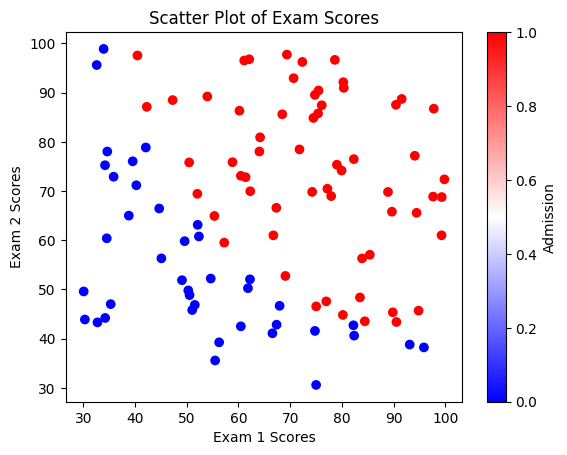

In [138]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your numpy arrays named exam1, exam2, and admission
# exam1 = np.array([...])
# exam2 = np.array([...])
# admission = np.array([...])

exam1 = np.array(matrix)[:, 0].squeeze()
exam2 = np.array(matrix)[:, 1].squeeze()
admission = np.array(matrix)[:, 2].squeeze()
# Scatter plot
plt.scatter(exam1, exam2, c=admission, cmap=plt.cm.bwr)

# Adding labels and title
plt.xlabel('Exam 1 Scores')
plt.ylabel('Exam 2 Scores')
plt.title('Scatter Plot of Exam Scores')

# Adding colorbar for legend
plt.colorbar(label='Admission')

# Display the plot
plt.show()


In [ ]:
# DO NOT MODIFY - HIDDEN TESTS HERE

2. Implement the `sigmoid` function mentioned in the lesson above.

In [139]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [ ]:
# DO NOT MODIFY - HIDDEN TESTS HERE

3. Write a function `cost_log` that takes in $\hat{\theta} \equiv \hat{\beta}^T$, $\mathbf{X}$, and $\vec{y}$ (in that order) and  and outputs the log-loss.

In [164]:
def cost_log(theta, X, y):
  print(f'cost log')
  print(f'theta shape {theta.shape}')
  print(f'X shape {X.shape}')
  print(f'y shape {y.shape}')
  print(theta)

  theta = theta.reshape(3, 100)
  beta = theta.T
  y_hat = X @ beta
  y_hat = sigmoid(y_hat)

  loss = -(y * np.log(y_hat) + (1-y)*np.log(1-y_hat))
  return loss




In [ ]:
# DO NOT MODIFY - HIDDEN TESTS HERE

4. Use the `gradient` function and the succeeding code snippet below to calculate $\hat{\beta}$.

##### `gradient`

In [148]:
print(x.shape)

(100, 3)


In [184]:
def cost_log(theta, X, y):
  print(f'cost log')
  print(f'theta shape {theta.shape}')
  print(f'X shape {X.shape}')
  print(f'y shape {y.shape}')
  print(theta)

  theta = theta.reshape(1, 3)
  beta = theta.T
  print(f'Beta shape now {beta.shape}')
  y_hat = X @ beta
  y_hat = sigmoid(y_hat)
  print(f'found y_hat with shape {y_hat.shape}')
  eps = 1e-10
  y_hat += eps

  loss = -(y * np.log(y_hat) + (1-y)*np.log(1-y_hat)).sum()
  return loss

def gradient(theta, X, y):
    print('grad')
    print(f'theta shape is {theta.shape}')
    print(f'X shape is {X.shape}')
    print(f'y shape is {y.shape}')
    theta = theta.reshape((1, 3))
    # print(f'theta shape {theta.shape} theta ravel {theta.ravel().shape}')
    # print(f'theta ravel is {theta.ravel()}')
    parameters = int(theta.ravel().shape[0])
    # parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    print(f'theta shape now is {theta.shape}')

    error = sigmoid(X @ theta.T) - y
    # error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

theta = beta.T
import scipy.optimize as opt

beta = opt.fmin_tnc(func=cost_log, x0=np.zeros((3, 1)), fprime=gradient, args=(x, y))[0].T
# beta = opt.fmin_tnc(func=cost_log, x0=theta, fprime=gradient, args=(X, y))[0].T
print(f'beta is {beta}')

cost log
theta shape (3,)
X shape (100, 3)
y shape (100, 1)
[0. 0. 0.]
Beta shape now (3, 1)
found y_hat with shape (100, 1)
grad
theta shape is (3,)
X shape is (100, 3)
y shape is (100, 1)
theta shape now is (1, 3)
cost log
theta shape (3,)
X shape (100, 3)
y shape (100, 1)
[1.59798331e-10 1.04898455e-08 1.05821648e-08]
Beta shape now (3, 1)
found y_hat with shape (100, 1)
grad
theta shape is (3,)
X shape is (100, 3)
y shape is (100, 1)
theta shape now is (1, 3)
cost log
theta shape (3,)
X shape (100, 3)
y shape (100, 1)
[4.60006794e-05 3.01968120e-03 3.04625690e-03]
Beta shape now (3, 1)
found y_hat with shape (100, 1)
grad
theta shape is (3,)
X shape is (100, 3)
y shape is (100, 1)
theta shape now is (1, 3)
cost log
theta shape (3,)
X shape (100, 3)
y shape (100, 1)
[4.60008399e-05 3.01969174e-03 3.04626753e-03]
Beta shape now (3, 1)
found y_hat with shape (100, 1)
grad
theta shape is (3,)
X shape is (100, 3)
y shape is (100, 1)
theta shape now is (1, 3)
cost log
theta shape (3,)
X 

In [ ]:
# DO NOT MODIFY - HIDDEN TESTS HERE

In [185]:
beta

array([4.67051226e-05, 3.06592387e-03, 3.09290654e-03])

5. Use the `predict` function below on the exam results in $\mathbf{X}$ to calculate the _accuracy_ of the regression, defined as the number of correct admissions it makes compared to $\vec{y}$.

##### `predict`

In [193]:
def predict(theta, X):
    probability = sigmoid(X @ theta.T)
    print(f'probability ')
    print(probability.shape)
    print(probability)
    return [1 if x >= 0.5 else 0 for x in probability]

In [201]:
y_flat = y.ravel()
print(y_flat.shape)
print(y_flat)
preds = predict(beta.T, x)
print(preds)

total = 0
for i in range(n):
  if y_flat[i] == preds[i]:
    total += 1

accuracy = total / n
print(f'accuracy: {accuracy}')
# n = len(x)
# print(n)
# accuracy = sum(predict(beta.T, x)) / n
# print(accuracy)

(100,)
[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1.]
probability 
(100,)
[0.58601686 0.55691884 0.58308043 0.6109973  0.61665827 0.57748314
 0.61913914 0.59243822 0.62333865 0.59713844 0.60161004 0.58046582
 0.61985797 0.62596569 0.58817911 0.6085992  0.59265015 0.58728164
 0.62342341 0.59464607 0.58397176 0.61739365 0.57593034 0.56012619
 0.61118145 0.60044689 0.59496589 0.60001682 0.58541691 0.57932098
 0.60190739 0.60786506 0.58784254 0.59251288 0.58504657 0.58152734
 0.60104543 0.60993751 0.58853866 0.58359633 0.60621761 0.57517822
 0.62067198 0.59344167 0.57402213 0.58706285 0.61174075 0.63831265
 0.62002514 0.63531971 0.61645563 0.62083009 0.60153358 0.57265615
 0.57646099 0.58347599 0.62536967 0.59763085 0.60912803 0.613682